In [255]:
#Load the necessary librares
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
import warnings
warnings.filterwarnings('ignore')

In [256]:
#load the dataset
df = pd.read_csv("SampleSuperstore.csv")
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Exploratory Data Analysis

In [257]:
#row,column count of data
df.shape

(9994, 13)

In [258]:
#check data types
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [259]:
#drop missing values
df.dropna(inplace=True)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [260]:
#chech if there are missing values
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [261]:
#delete unwanted value
df=df.drop(columns= 'Postal Code',axis = 1)
df.head()


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [262]:
#remove duplicate values
df.drop_duplicates(inplace=True)
df.head(10)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [263]:
df.tail(6)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9988,Standard Class,Corporate,United States,Athens,Georgia,South,Technology,Phones,206.100,5,0.0,55.6470
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [264]:
print(df["Ship Mode"].unique())
print(df["Segment"].unique())
print(df["Country"].unique())
print(df["Category"].unique())
print(df["Sub-Category"].unique())
print(df["Region"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['South' 'West' 'Central' 'East']


In [265]:
#Statisrical description of the data
df.describe()

,Sales,Quantity,Discount,Profit
count,9944.000000,9944.000000,9944.000000,9944.000000
mean,230.752150,3.794047,0.156440,28.770873
std,624.644765,2.228752,0.206584,234.841370
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.340000,2.000000,0.000000,1.724800
50%,55.000000,3.000000,0.200000,8.679950
75%,210.104000,5.000000,0.200000,29.534700
max,22638.480000,14.000000,0.800000,8399.976000


In [266]:
df['Sales'].value_counts()

Sales
12.960     52
10.368     35
25.920     34
15.552     34
19.440     34
           ..
433.568     1
4.240       1
319.960     1
383.438     1
243.160     1
Name: count, Length: 5825, dtype: int64

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9944 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9944 non-null   object 
 1   Segment       9944 non-null   object 
 2   Country       9944 non-null   object 
 3   City          9944 non-null   object 
 4   State         9944 non-null   object 
 5   Region        9944 non-null   object 
 6   Category      9944 non-null   object 
 7   Sub-Category  9944 non-null   object 
 8   Sales         9944 non-null   float64
 9   Quantity      9944 non-null   int64  
 10  Discount      9944 non-null   float64
 11  Profit        9944 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1009.9+ KB


In [268]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [269]:
#check data type
df.dtypes['Sales']

dtype('float64')

In [270]:
df['Category'].value_counts().sum()

9944

In [271]:
#change data type
df['Sales']=df['Sales'].astype('int')
df.dtypes['Sales']

dtype('int32')

In [272]:
#Group Two columns and take sum
df.groupby('City')['Sales'].sum()

City
Aberdeen         25
Abilene           1
Akron          2719
Albuquerque    2213
Alexandria     5510
               ... 
Woonsocket      193
Yonkers        7647
York            816
Yucaipa          50
Yuma            838
Name: Sales, Length: 531, dtype: int32

In [273]:
#Group two columns and take mean
df.groupby('City')['Sales'].mean()

City
Aberdeen        25.000000
Abilene          1.000000
Akron          129.476190
Albuquerque    158.071429
Alexandria     344.375000
                  ...    
Woonsocket      48.250000
Yonkers        509.800000
York           163.200000
Yucaipa         50.000000
Yuma           209.500000
Name: Sales, Length: 531, dtype: float64

In [274]:

num_columns=df.select_dtypes(include=[np.number]).columns
corr_matrix=df[num_columns].corr()
corr_matrix


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200508,-0.028577,0.479061
Quantity,0.200508,1.000000,0.008307,0.066089
Discount,-0.028577,0.008307,1.000000,-0.219939
Profit,0.479061,0.066089,-0.219939,1.000000


# Visualizations

Text(0.5, 1.0, 'sales by region')

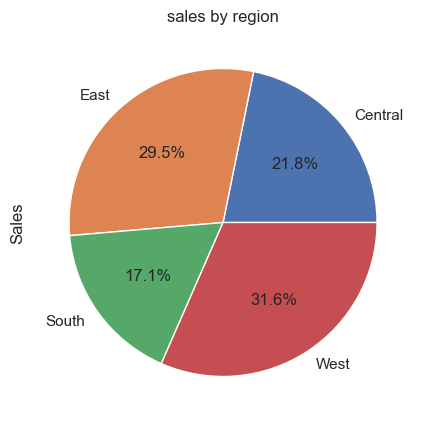

In [275]:
#Sales by Region(pie chart)
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.1f%%")
plt.title('sales by region')

Text(0.5, 1.0, 'profit by region')

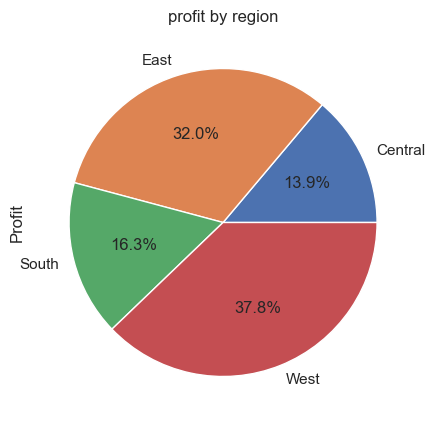

In [276]:
#pie chart between region and profit
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.1f%%")
plt.title('profit by region')

Text(0.5, 1.0, 'Sales by Segment')

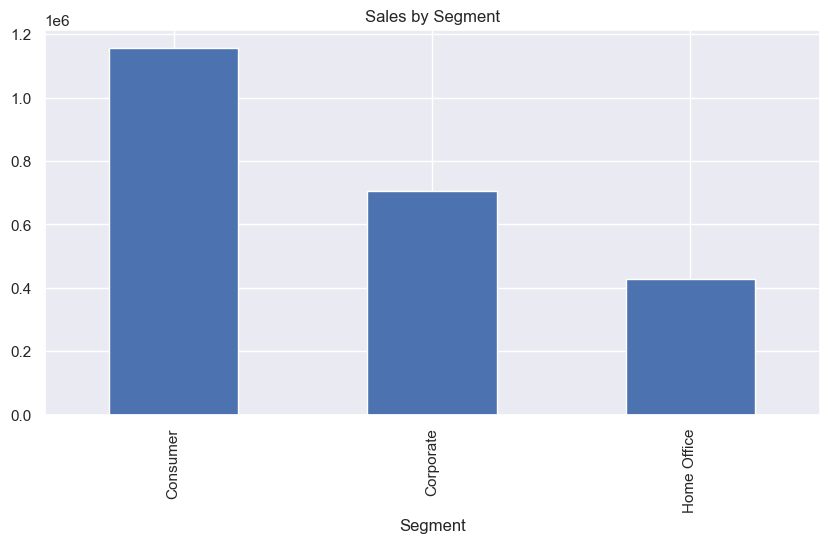

In [277]:
#bar plot between segment and sales 
df.groupby("Segment")["Sales"].sum().plot.bar()
plt.title('Sales by Segment')

Text(0.5, 1.0, 'profit by Segment')

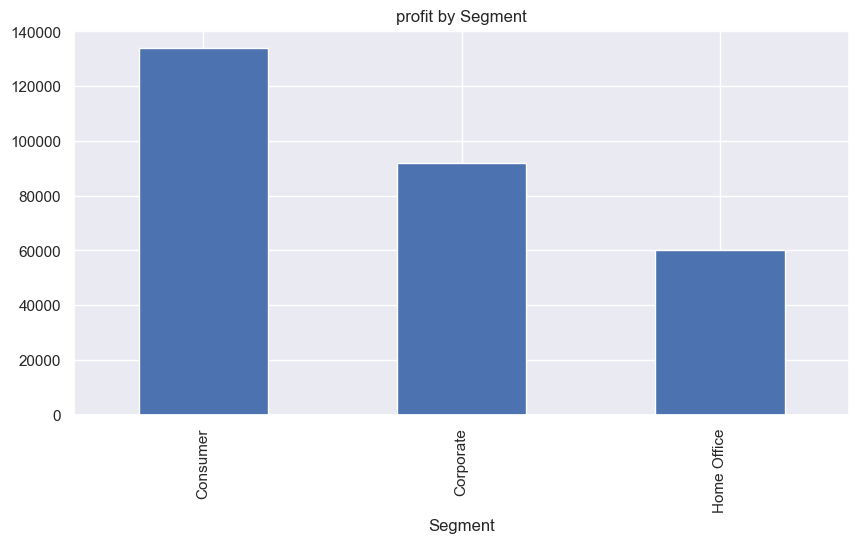

In [278]:
#bar plot between segment and profit 
df.groupby("Segment")["Profit"].sum().plot.bar()
plt.title('profit by Segment')

Text(0.5, 1.0, 'Sales by Category')

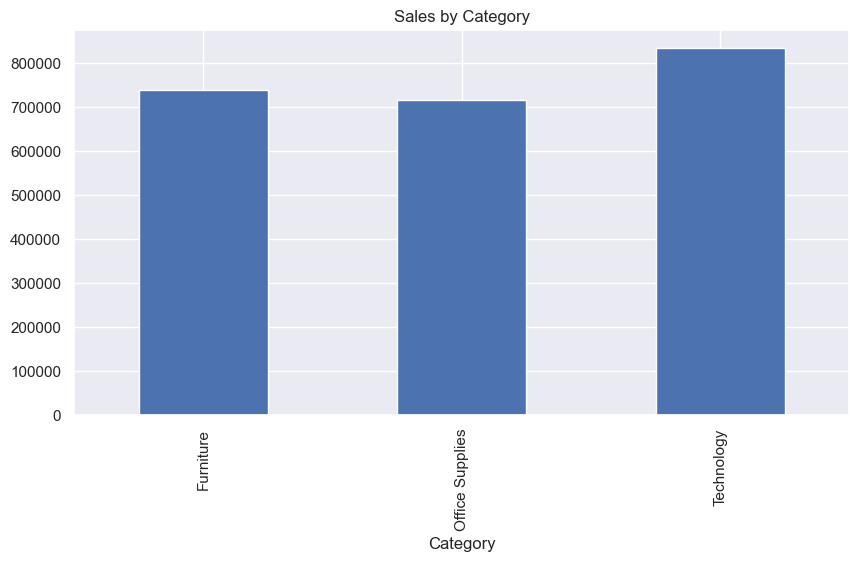

In [279]:
#bar plot between category and sales 
df.groupby("Category")["Sales"].sum().plot.bar()
plt.title('Sales by Category')

Text(0.5, 1.0, 'profit by category')

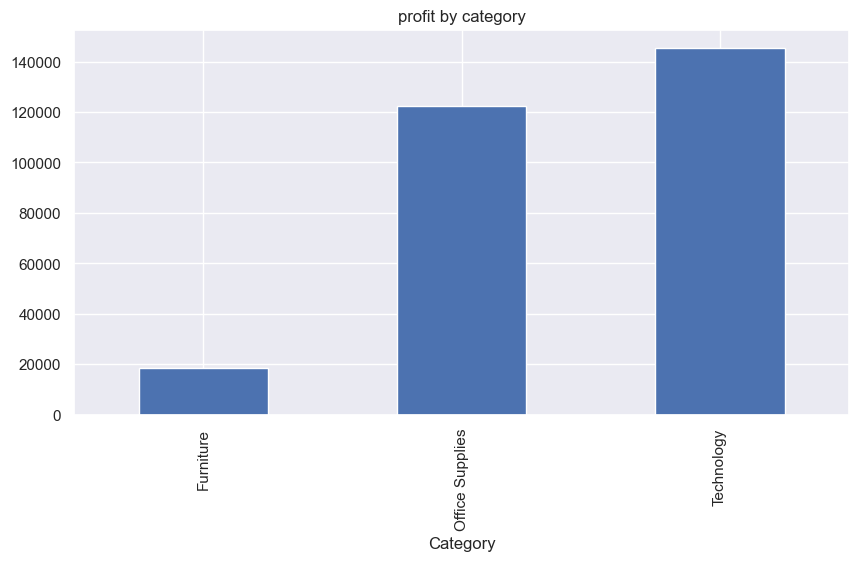

In [280]:
#bar plot between category and profit 
df.groupby("Category")["Profit"].sum().plot.bar()
plt.title('profit by category')

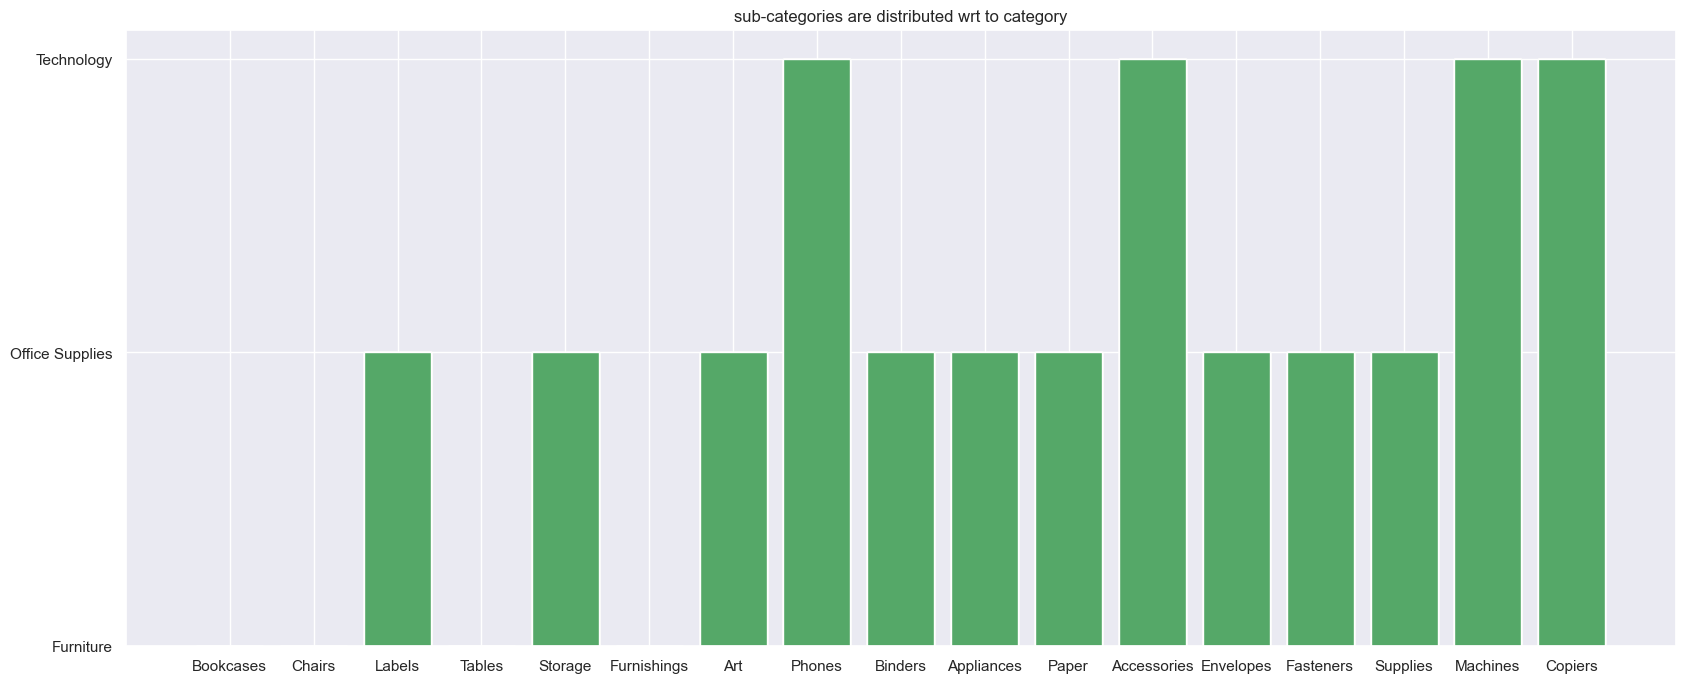

In [281]:
#Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(20,8))
plt.bar('Sub-Category','Category',data=df,color='g')
plt.title('sub-categories are distributed wrt to category')
plt.show()

Text(0.5, 1.0, 'sales by category')

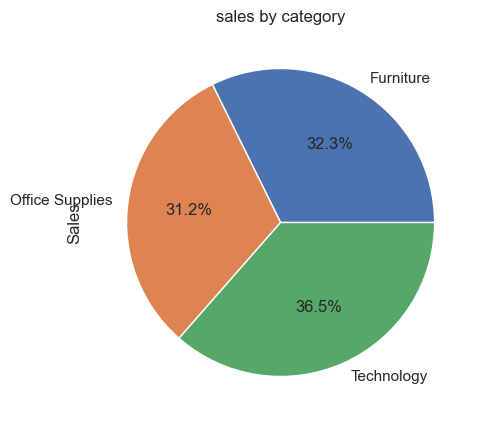

In [282]:
df.groupby("Category")["Sales"].sum().plot.pie(autopct="%1.1f%%")
plt.title('sales by category')

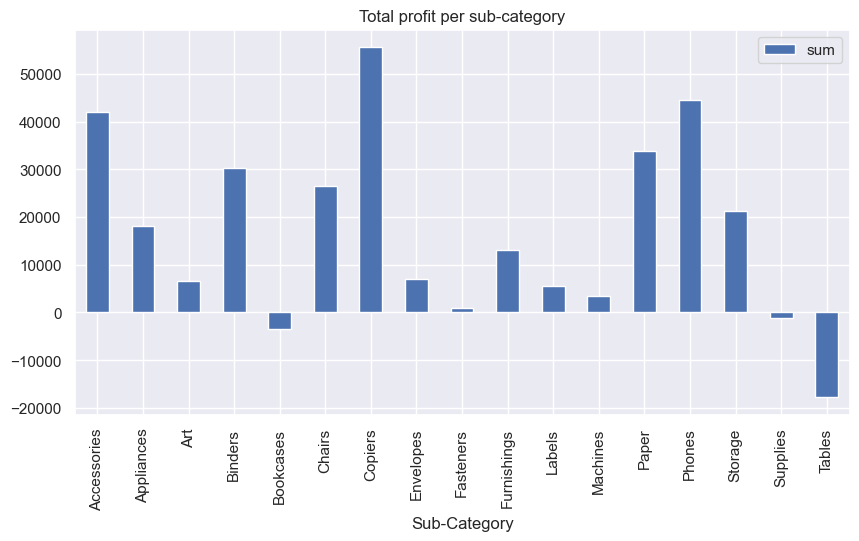

In [302]:
df.groupby('Sub-Category')['Profit'].agg(['sum']).plot.bar()
plt.title('Total profit per sub-category')
plt.show()

Text(0.5, 1.0, 'profit by category')

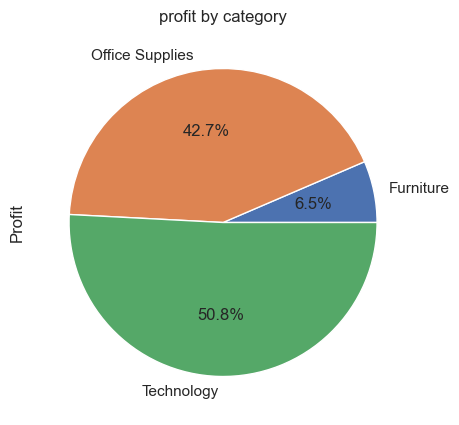

In [284]:
df.groupby("Category")["Profit"].sum().plot.pie(autopct="%1.1f%%")
plt.title('profit by category')

Text(0.5, 1.0, 'sales by state')

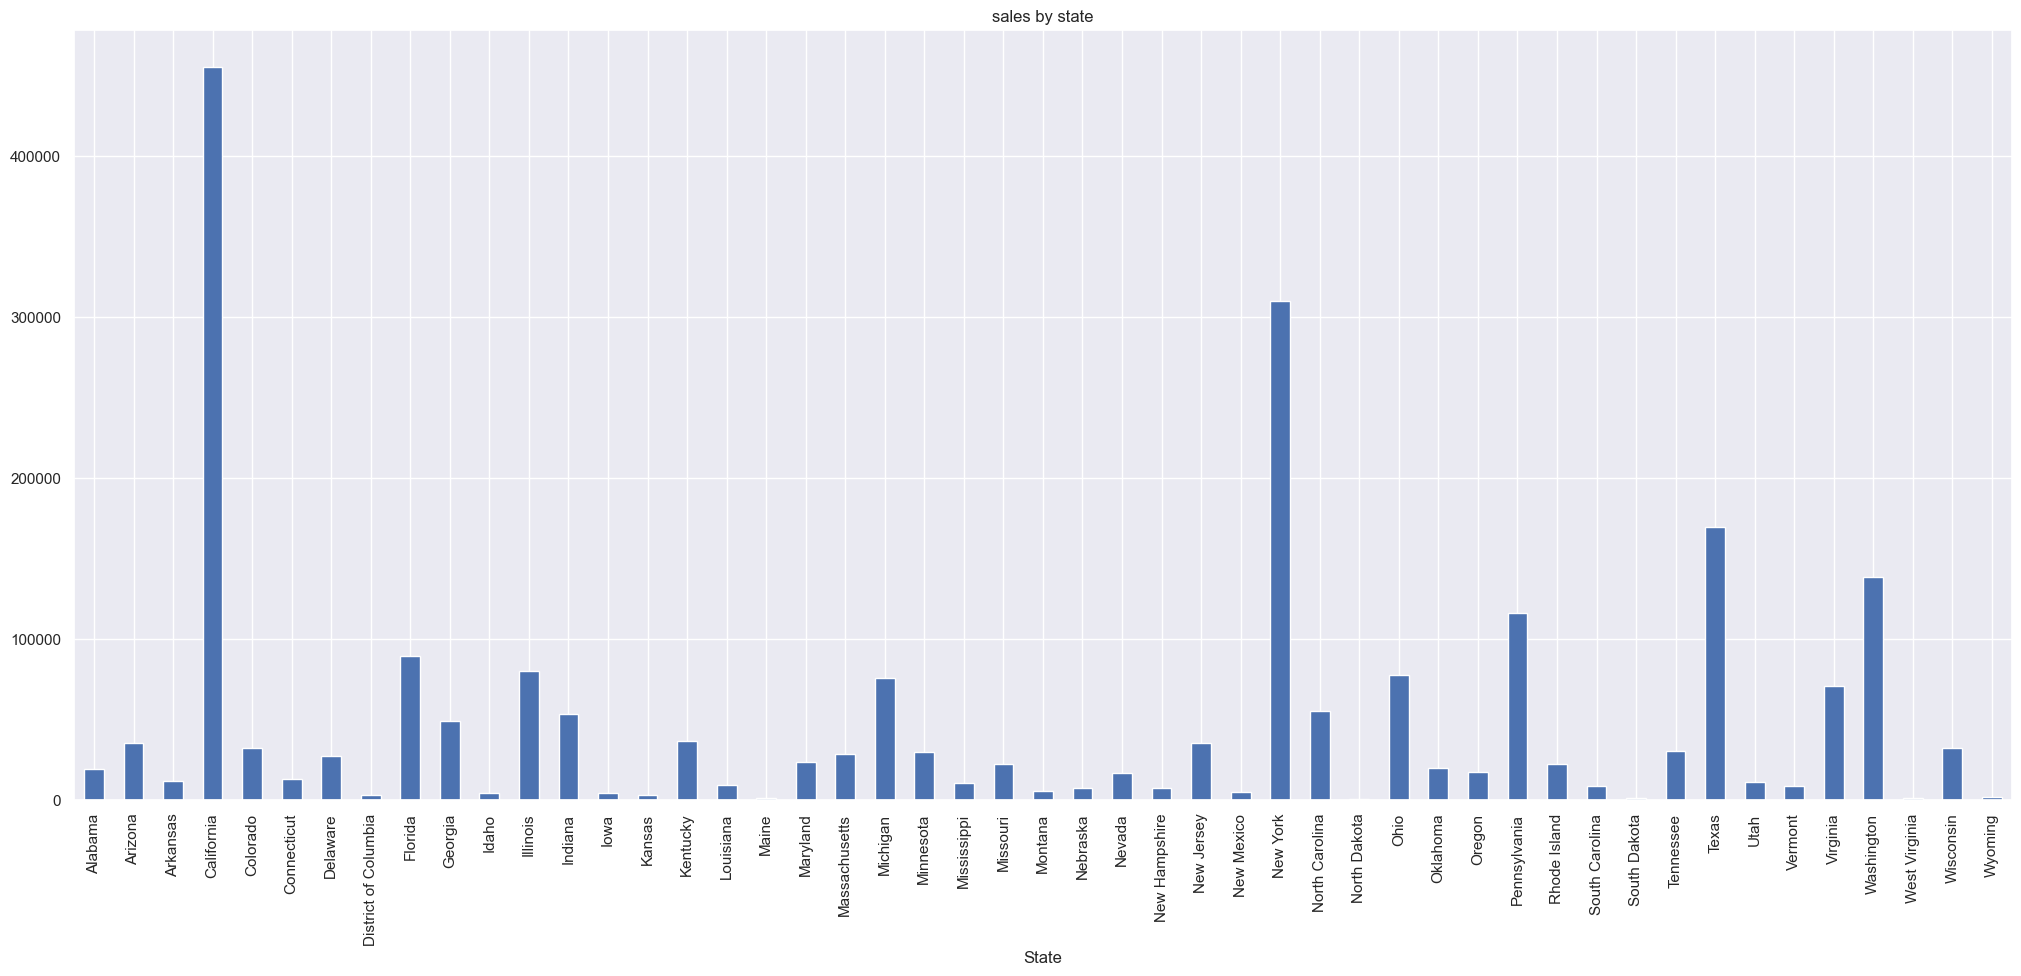

In [285]:
plt.figure(figsize=(25,10))
df.groupby("State")["Sales"].sum().plot.bar()
plt.title('sales by state')


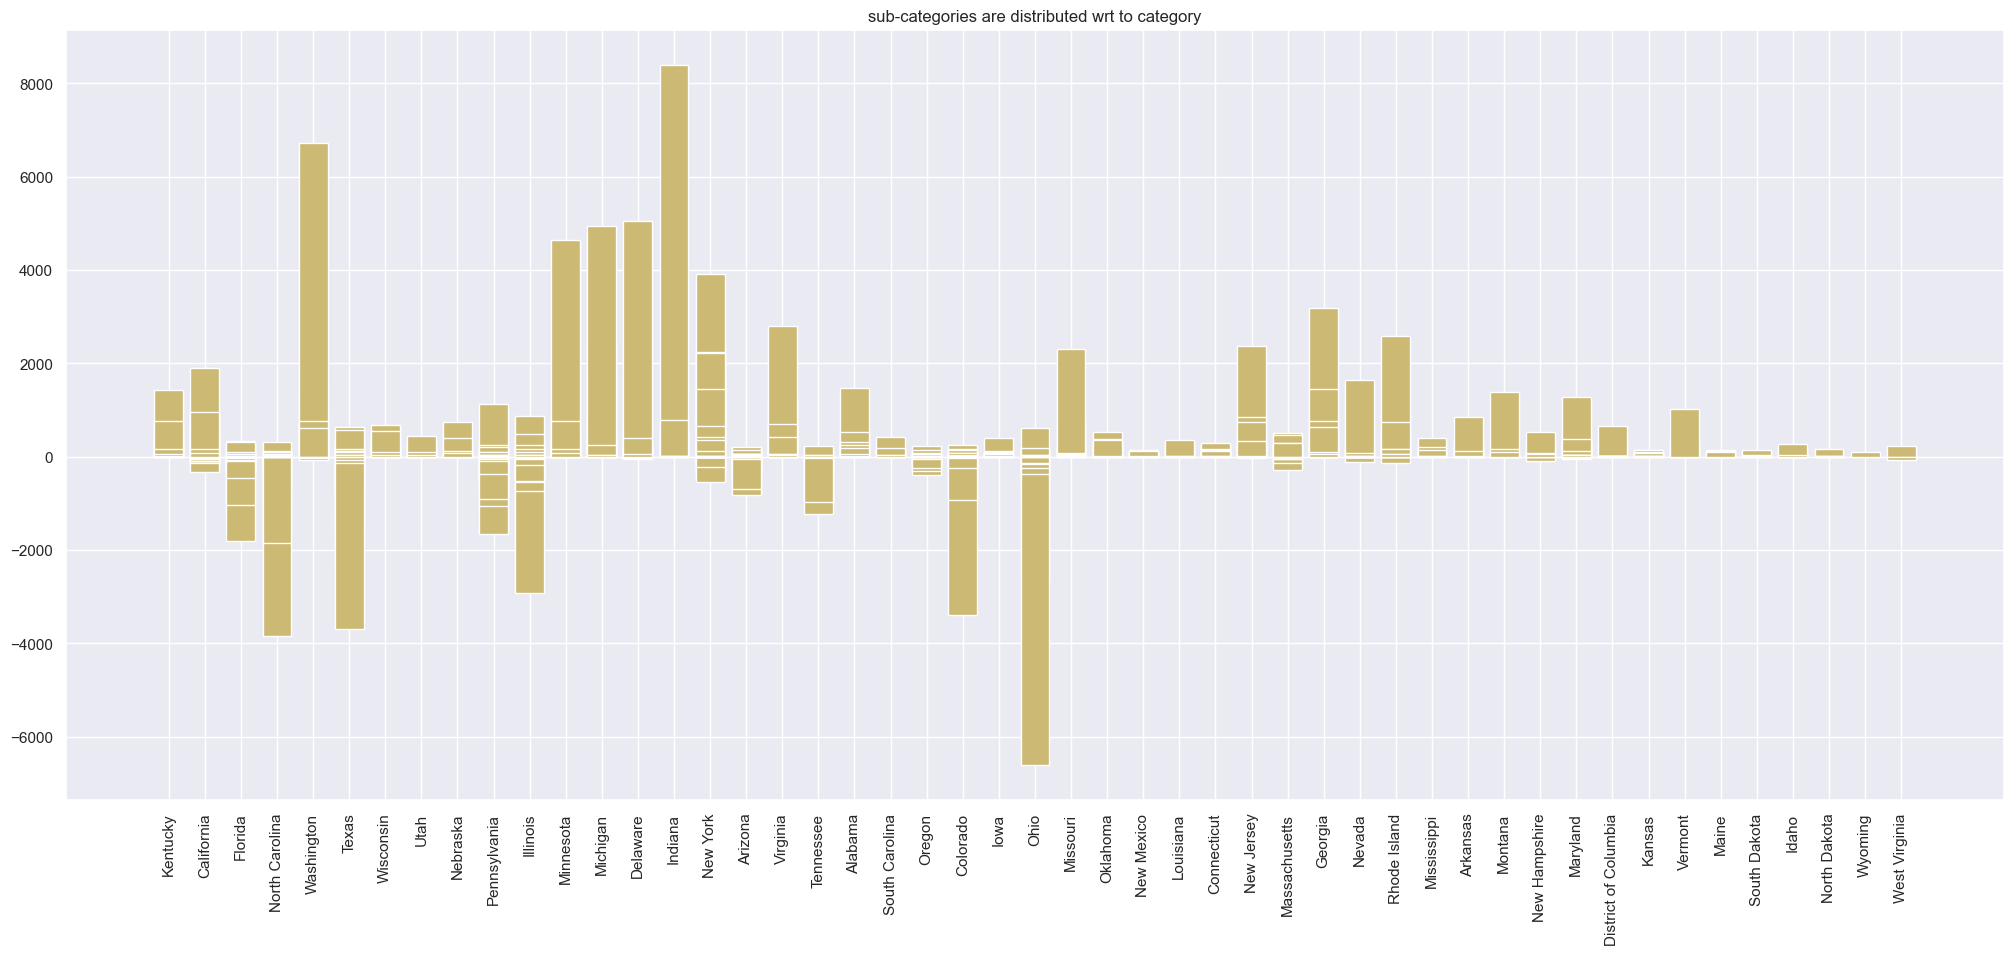

In [286]:

#Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(25,10))
plt.bar('State','Profit',data=df,color='y')
plt.xticks(rotation=90)
plt.title('sub-categories are distributed wrt to category')
plt.show()


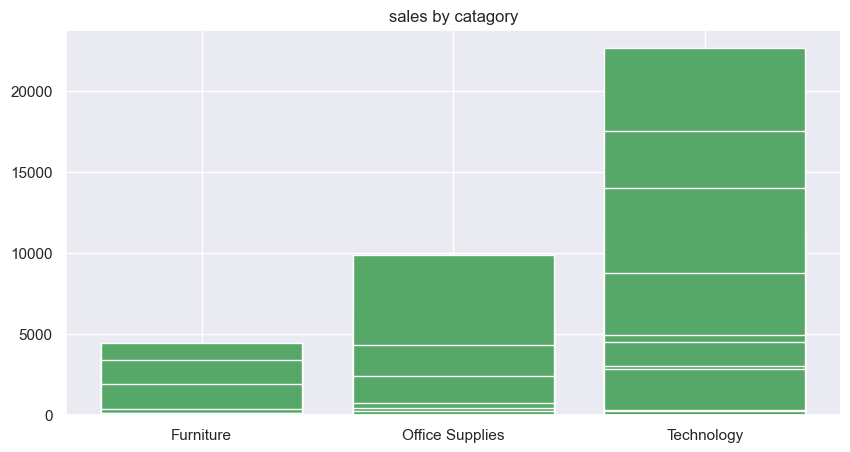

In [287]:
plt.figure(figsize=(10,5))
plt.bar('Category','Sales',data=df,color='g')
plt.title('sales by catagory')
plt.show()

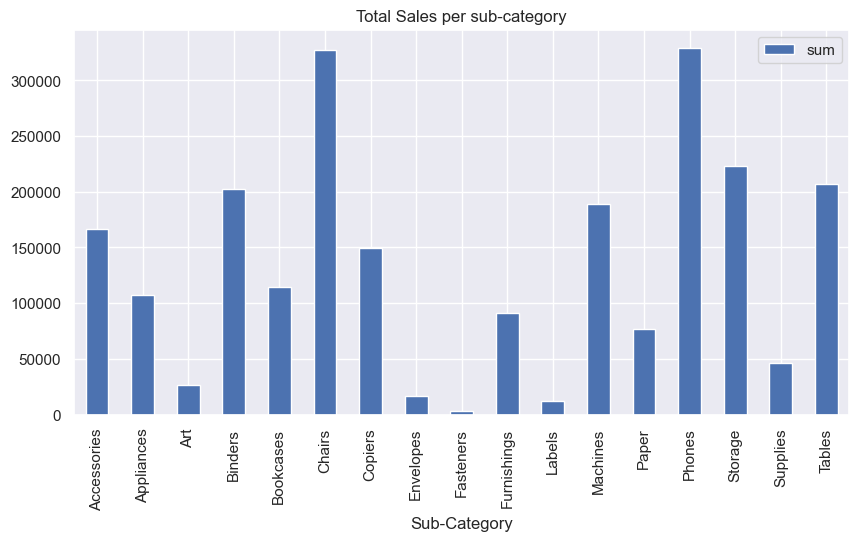

In [288]:

df.groupby('Sub-Category')['Sales'].agg(['sum']).plot.bar()
plt.title('Total Sales per sub-category')
#plt.rcParamns['figure.figsize']=[10,9]
plt.show()

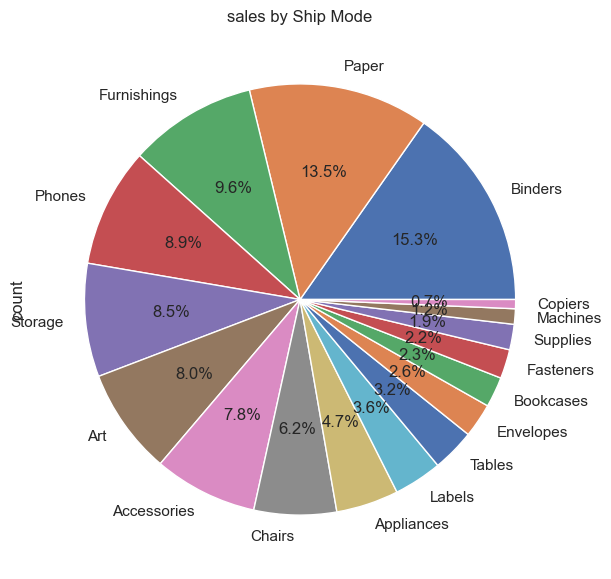

In [289]:
plt.figure(figsize=(20,7))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('sales by Ship Mode')
plt.show()

The store has wide variety of Office Supplies especially in Binders and Paper department.

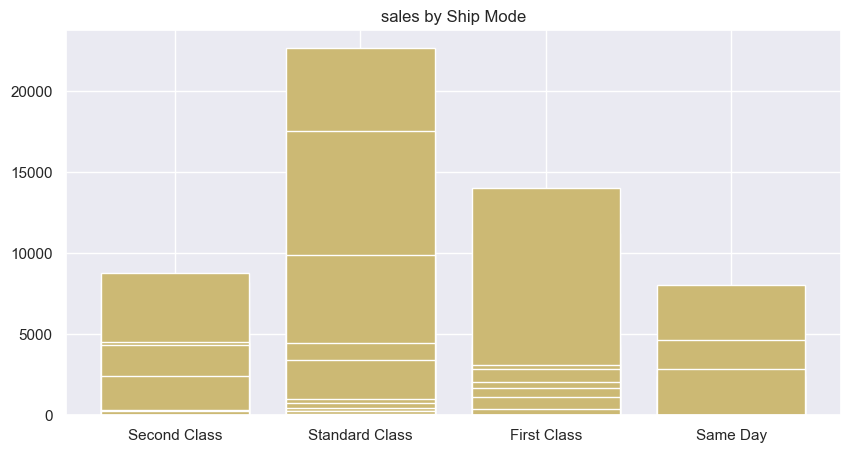

In [290]:

plt.bar('Ship Mode','Sales',data=df , color='y')
plt.title('sales by Ship Mode')
plt.show()


State
California              1980
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

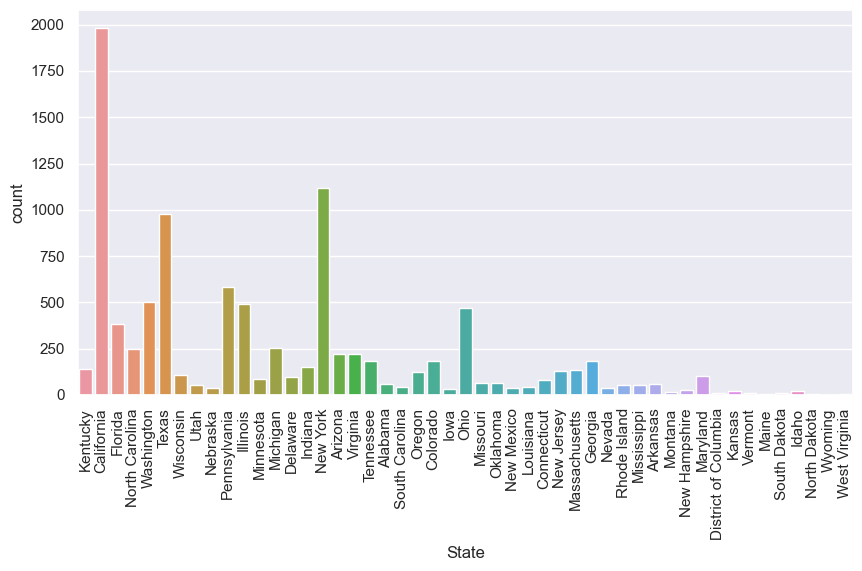

In [291]:
print(df['State'].value_counts())
plt.Figure(figsize=(25,8))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'total number of orders from top 10 states')

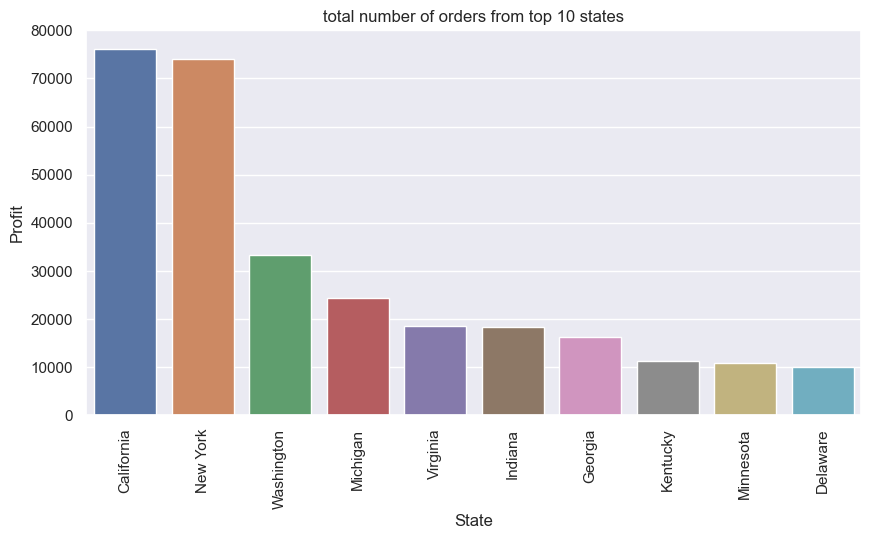

In [292]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False).head(10)
sns.barplot(data = sales_state, x = 'State',y= 'Profit')
plt.xticks(rotation=90)
plt.title('total number of orders from top 10 states')



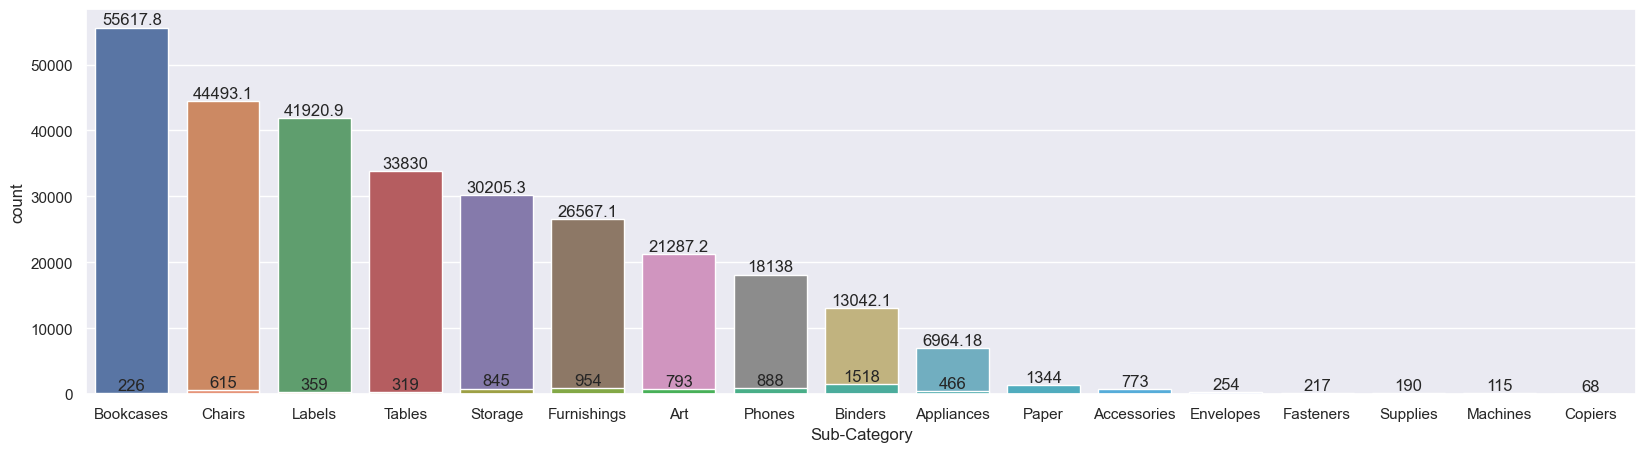

In [293]:
sales_state = df.groupby(['Sub-Category'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Sub-Category',y= 'Profit')
ax = sns.countplot(data = df, x = 'Sub-Category')

for bars in ax.containers:
    ax.bar_label(bars)

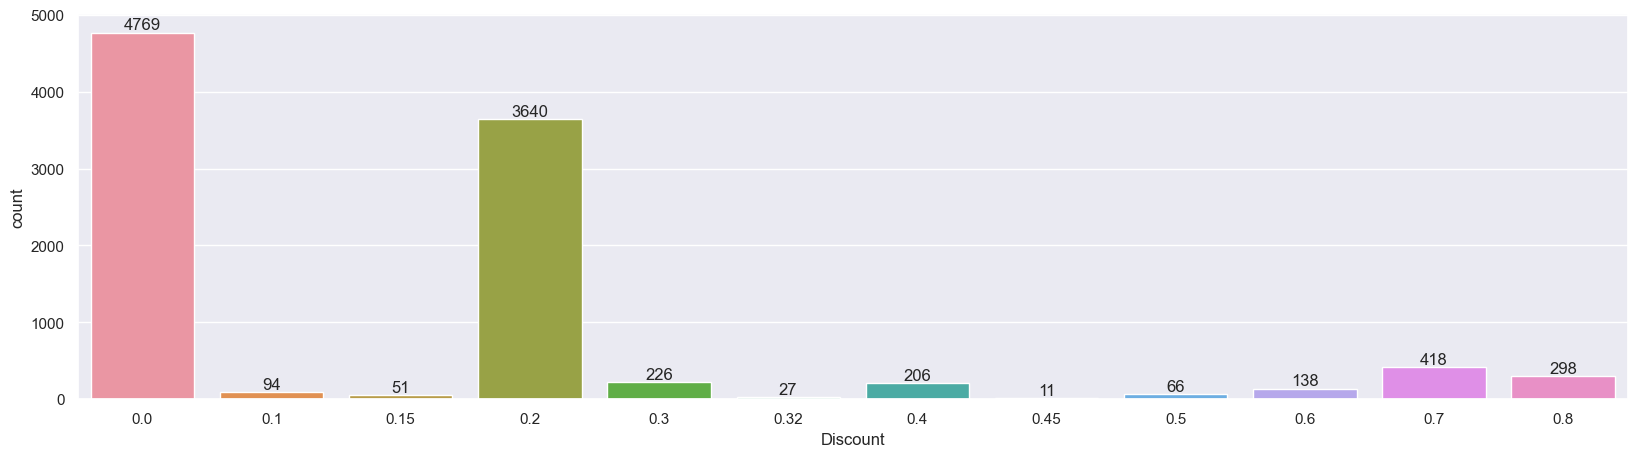

In [294]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Discount')

for bars in ax.containers:
    ax.bar_label(bars)

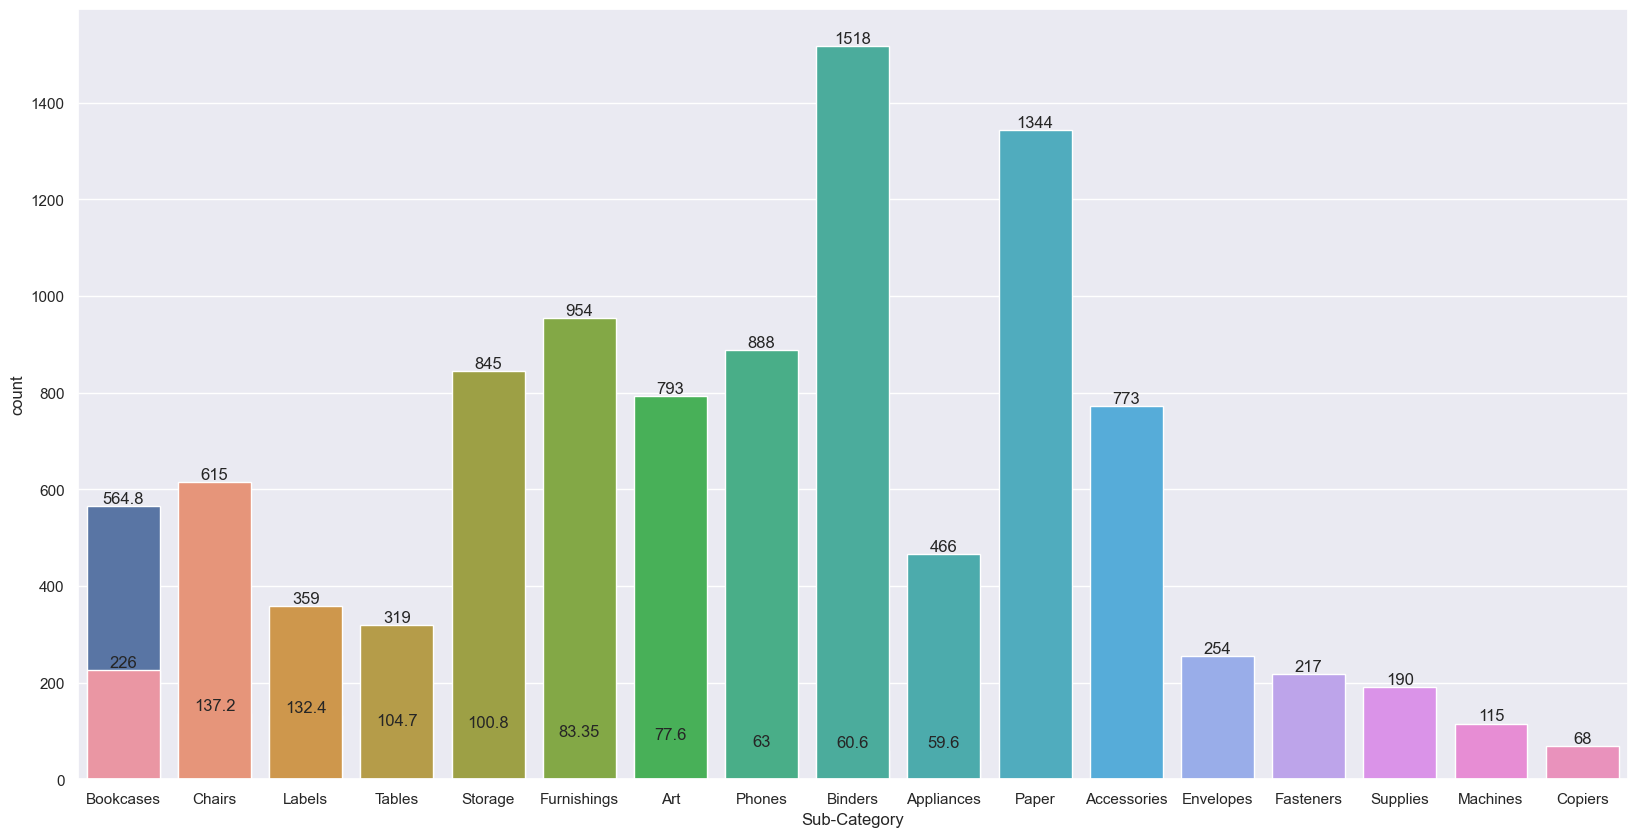

In [295]:
sales_state = df.groupby(['Sub-Category'], as_index=False)['Discount'].sum().sort_values(by='Discount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data = sales_state, x = 'Sub-Category',y= 'Discount')
ax = sns.countplot(data = df, x = 'Sub-Category')
plt.title('')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Segment', ylabel='Profit'>

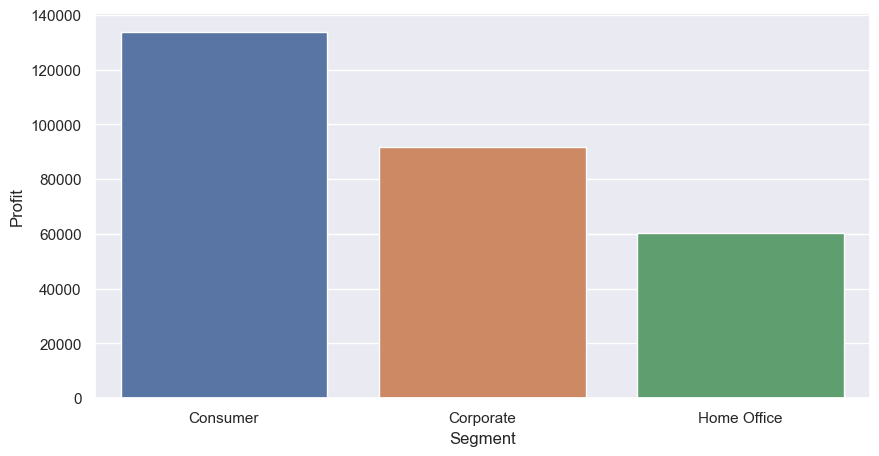

In [296]:
sales_state = df.groupby(['Segment'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False).head(10)

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data = sales_state, x = 'Segment',y= 'Profit')

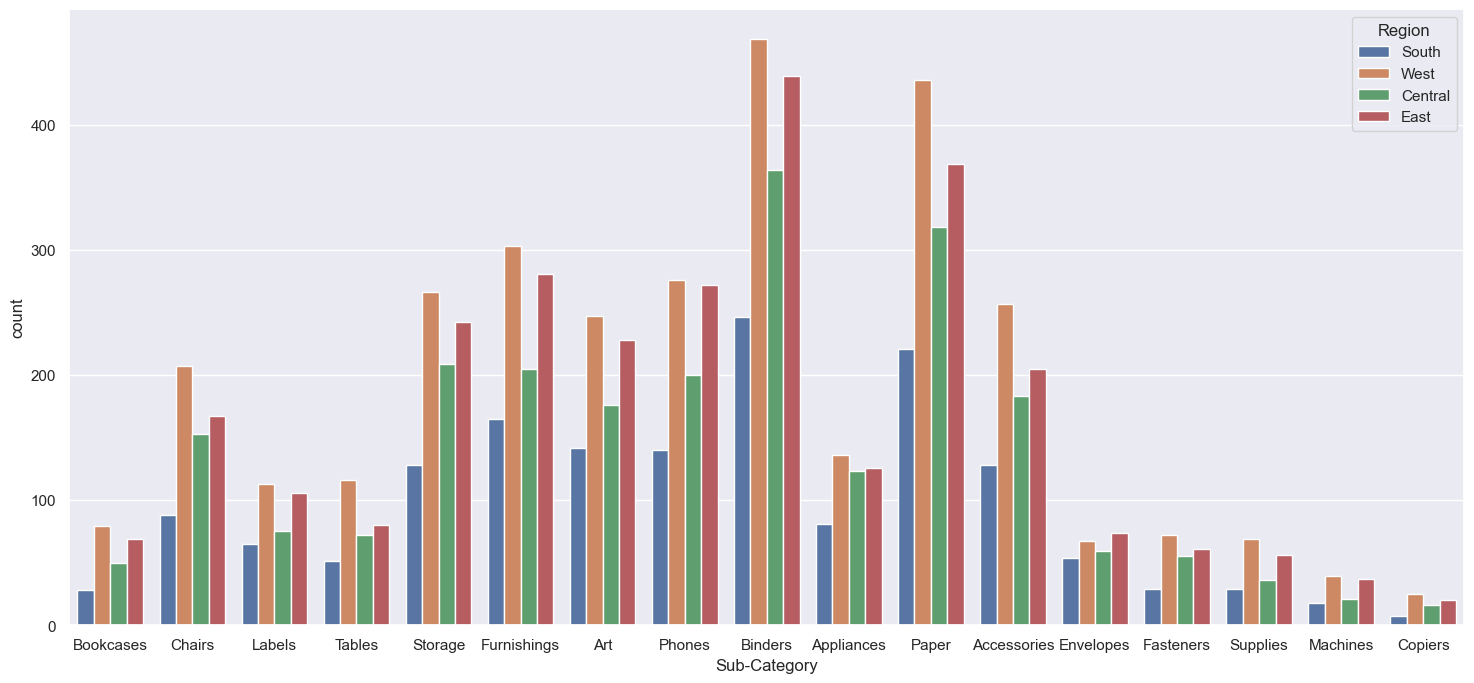

In [297]:
#Count of Sub-Category region wise
plt.figure(figsize=(18,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()





(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2799'),
  Text(1, 0, '2999'),
  Text(2, 0, '4899'),
  Text(3, 0, '6354'),
  Text(4, 0, '9449'),
  Text(5, 0, '9892'),
  Text(6, 0, '10499'),
  Text(7, 0, '11199'),
  Text(8, 0, '13999'),
  Text(9, 0, '17499')])

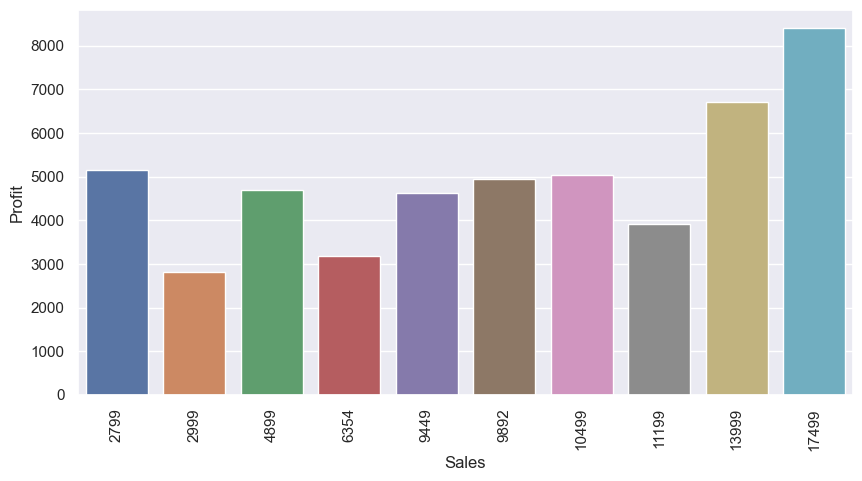

In [298]:


sales_state = df.groupby(['Sales'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False).head(10)
sns.barplot(data = sales_state, x = 'Sales',y= 'Profit')
plt.xticks(rotation=90)
#plt.title('total number of orders from top 10 states')



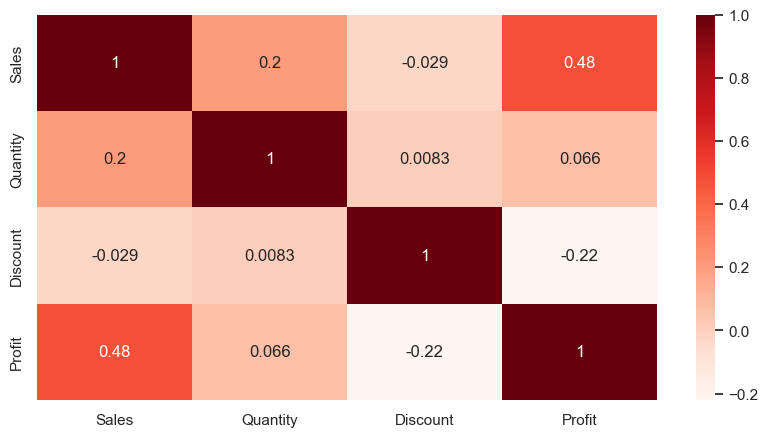

In [300]:

corr_matrix
sns.heatmap(corr_matrix,cmap='Reds',annot=True);
plt.rcParams['figure.figsize']=(10,5)
#plt.title()

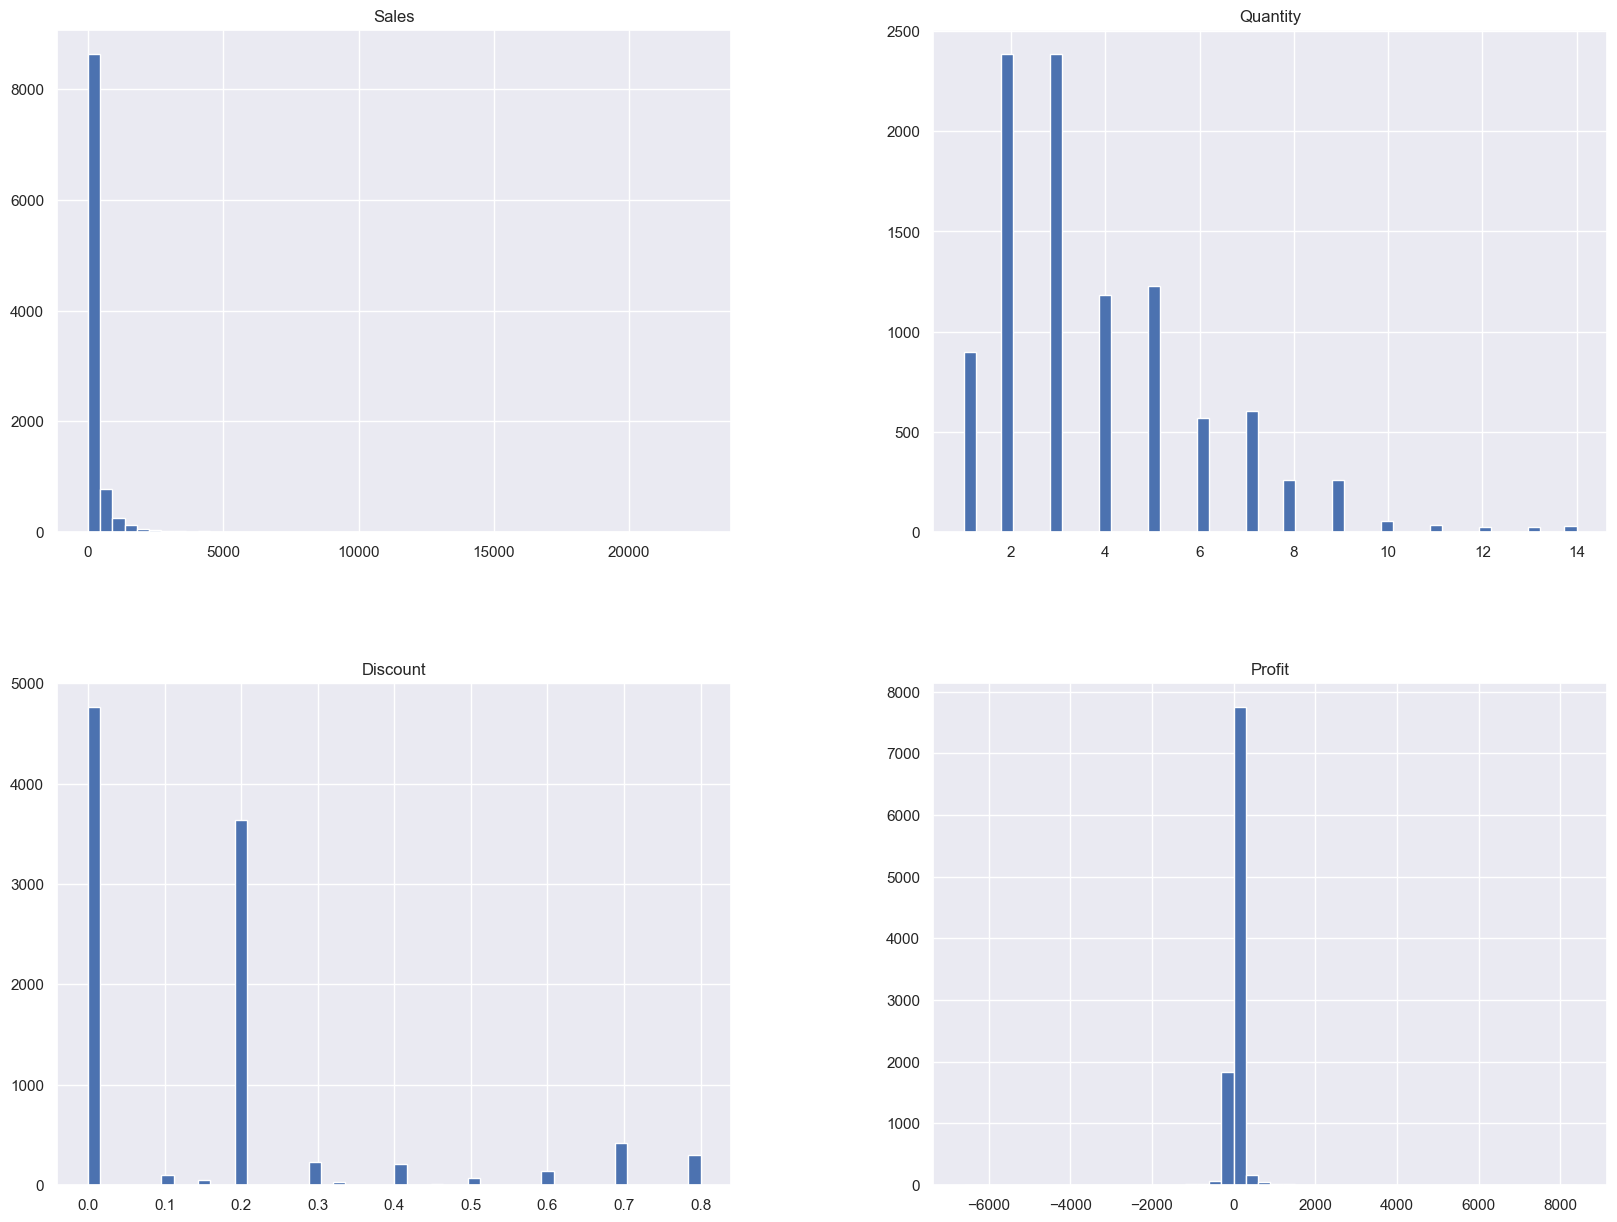

In [303]:
df.hist(bins=50,figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'dicount by category')

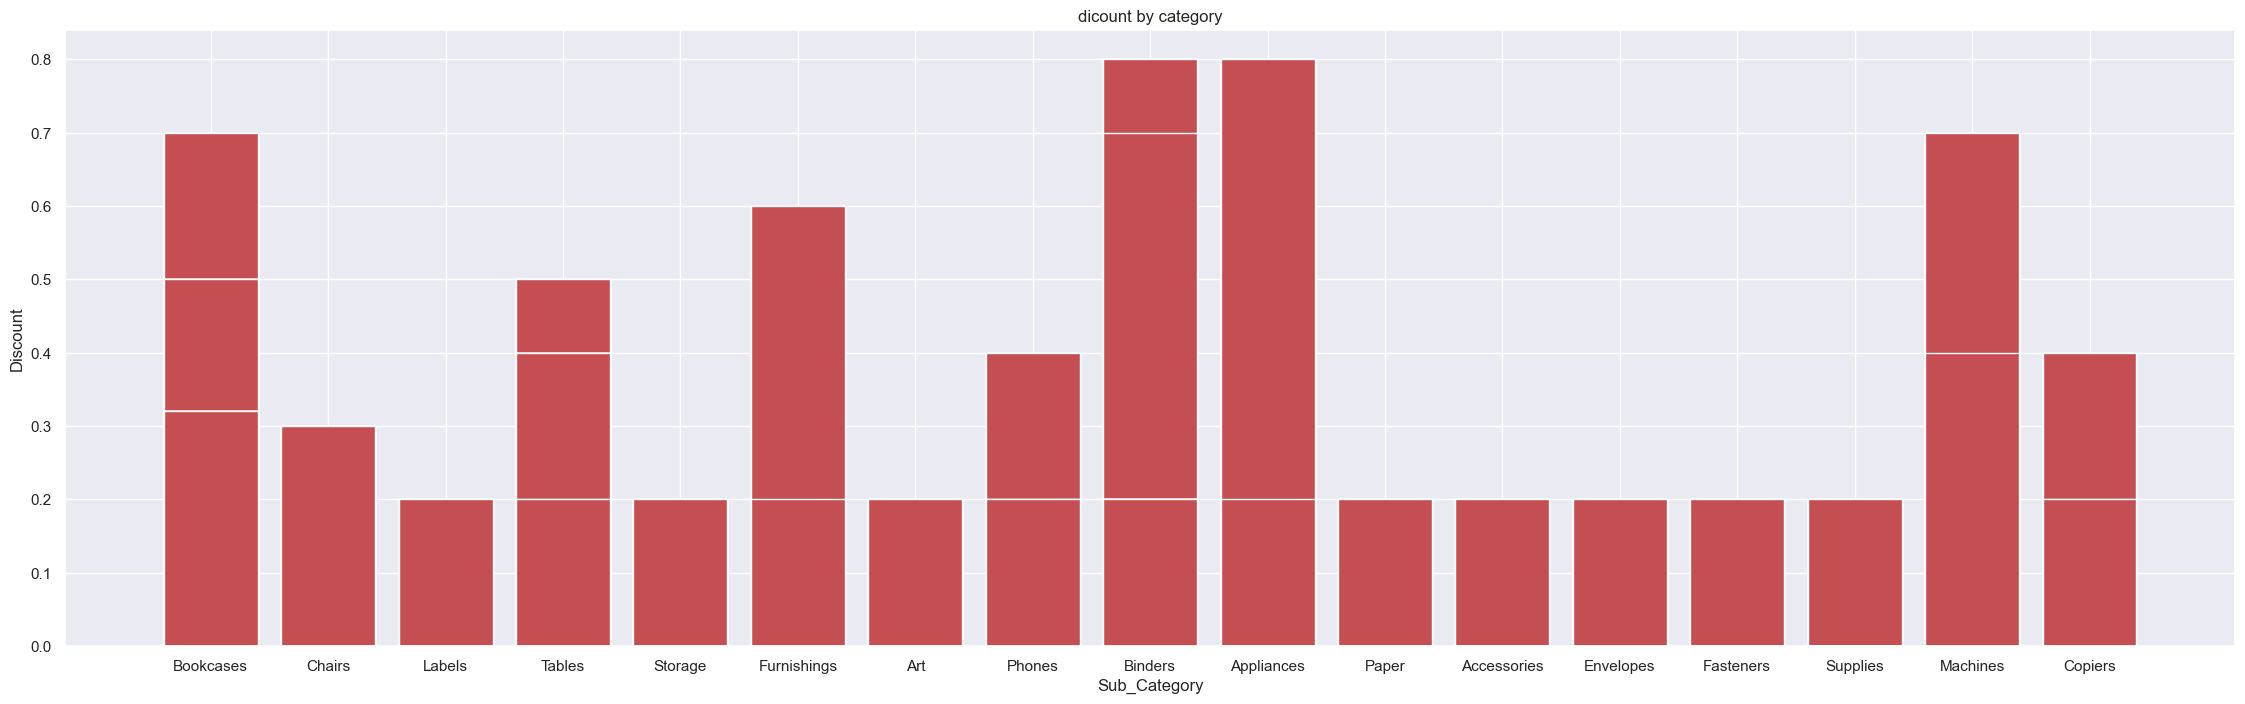

In [ ]:
plt.rcParams['figure.figsize']=(28,8)
plt.bar(df['Sub-Category'],df['Discount'],color='r')
plt.rcParams.update({'font.size':14})
plt.xlabel('Sub_Category')
plt.ylabel('Discount')
plt.title('dicount by category')

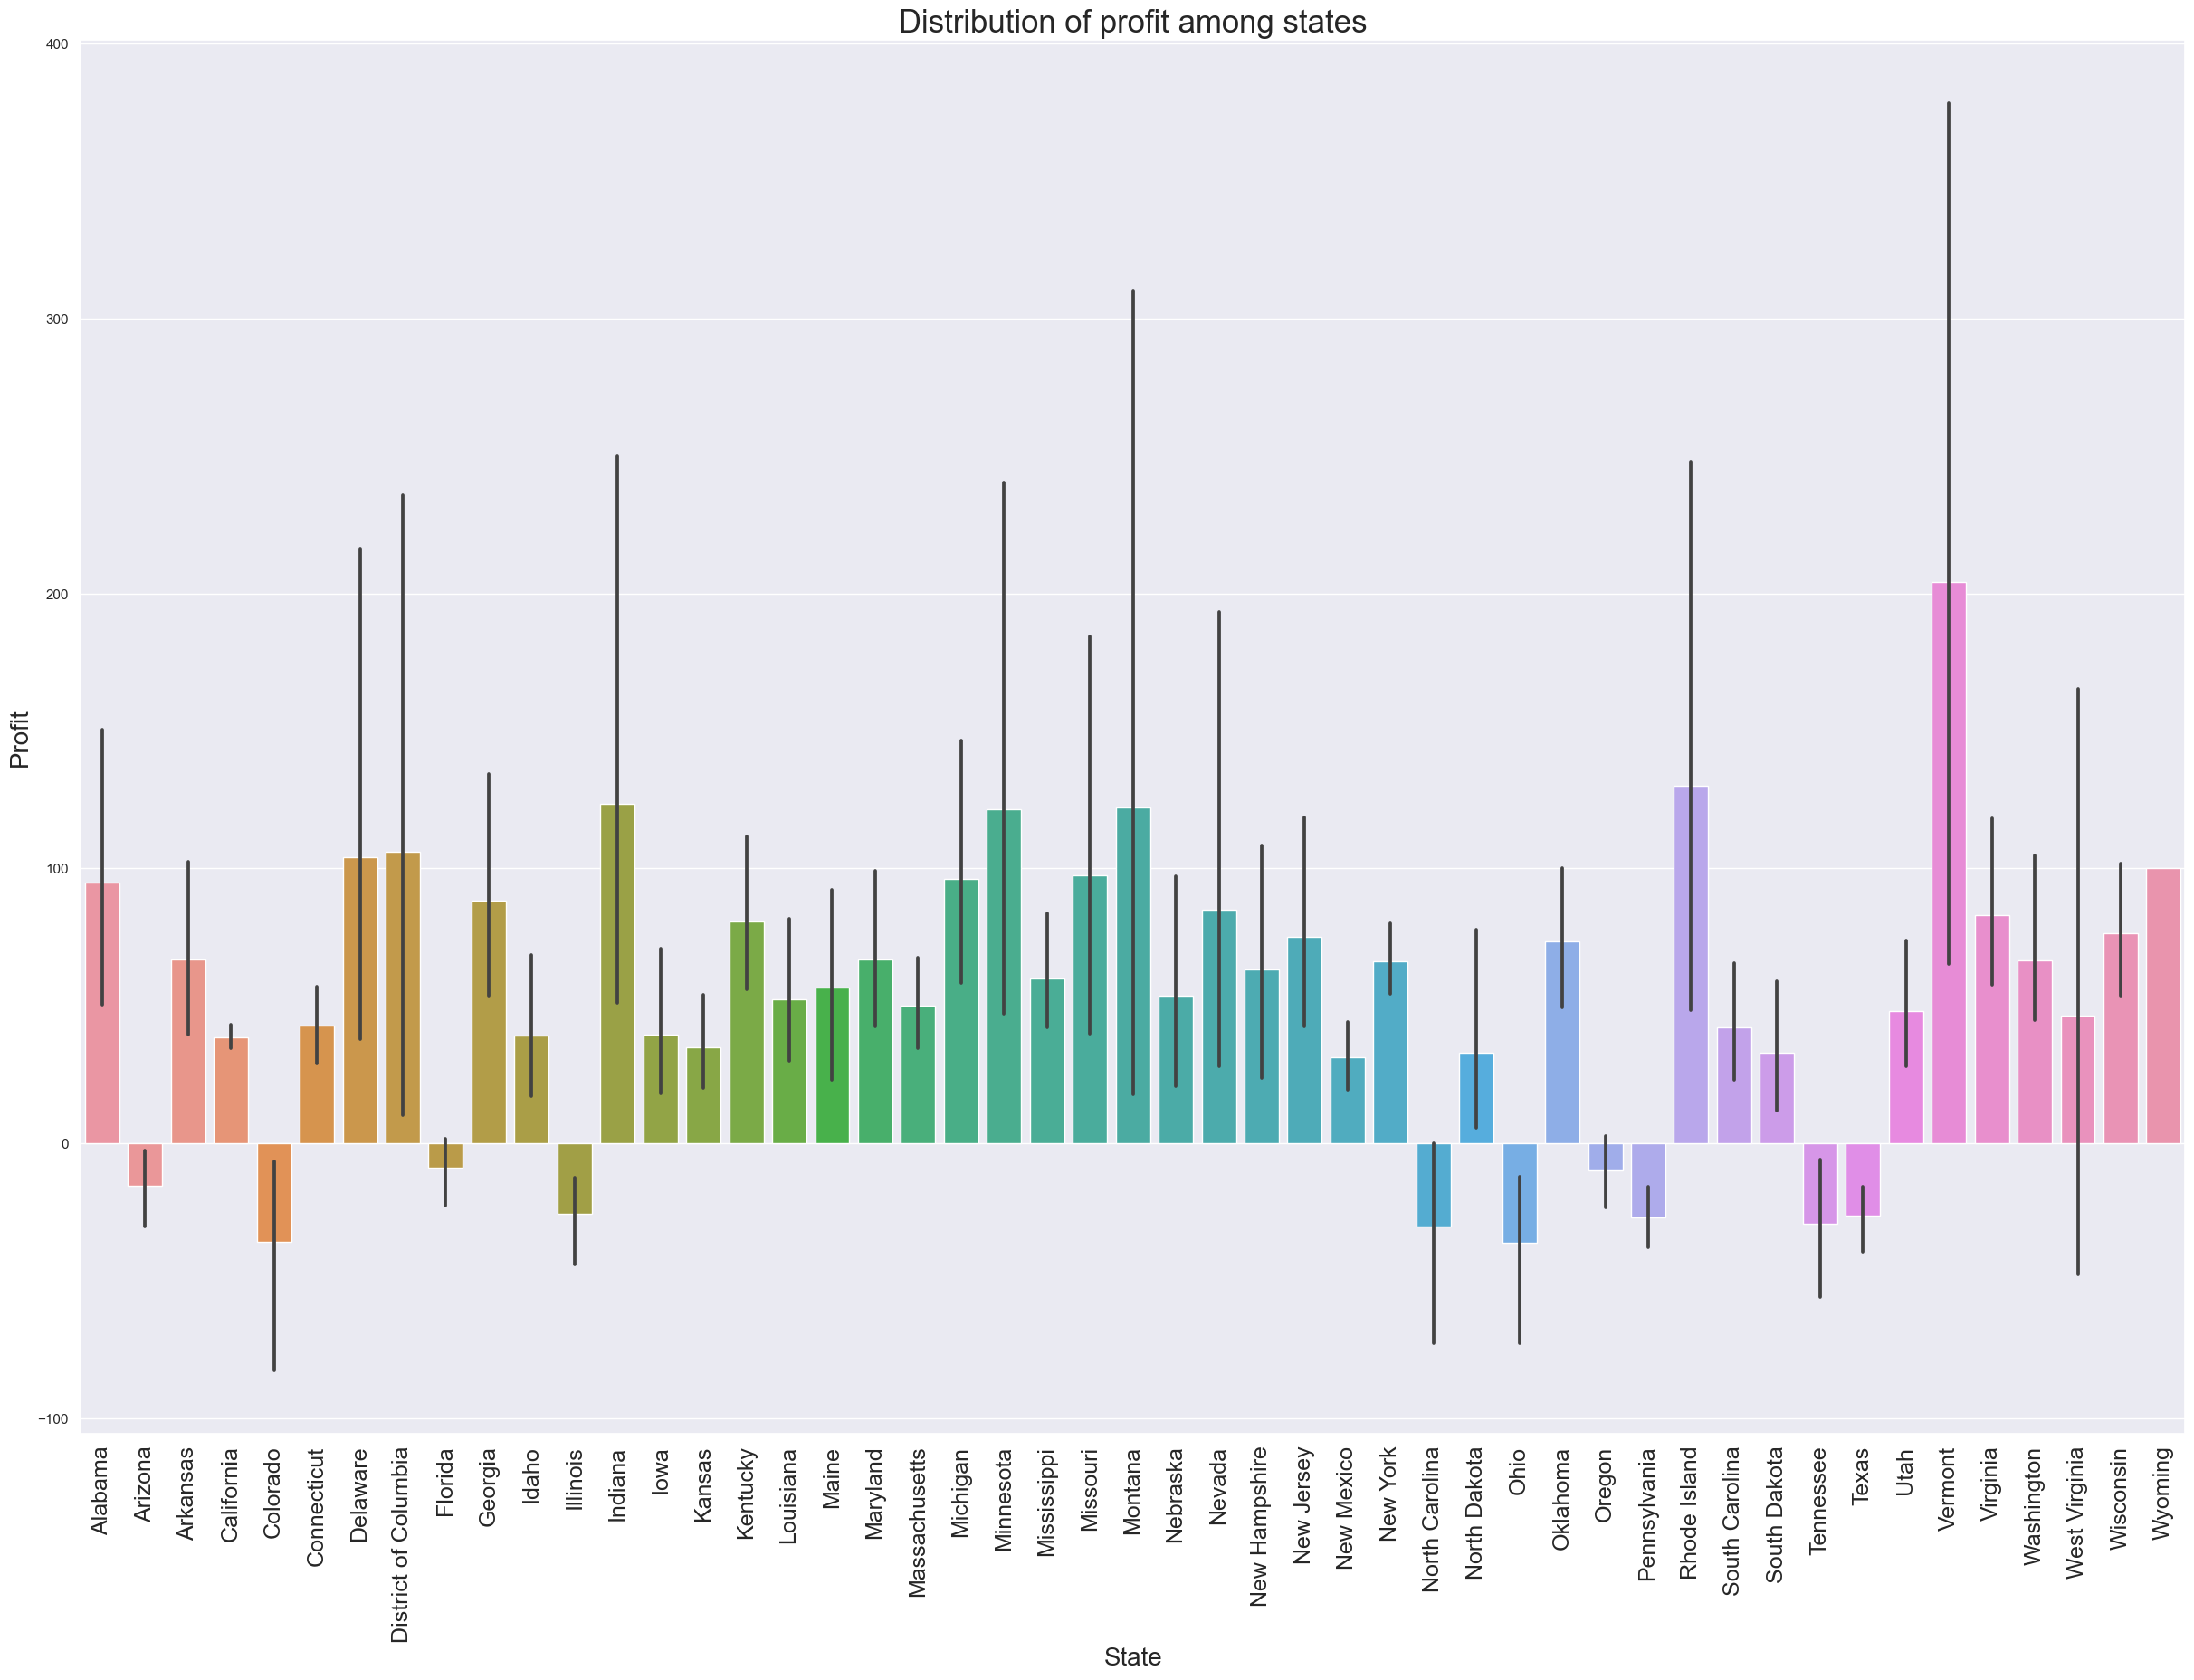

In [305]:
plt.figure(figsize=(30,20))
sns.barplot(x=df['State'].sort_values(ascending=True),y=df['Profit'])
plt.title('Distribution of profit among states',fontsize=25)
plt.xticks(rotation=90,fontsize=18)
plt.xlabel('State',fontsize=20)
plt.ylabel('Profit',fontsize=20)
plt.show()


Text(0.5, 1.0, 'discount vs Profit')

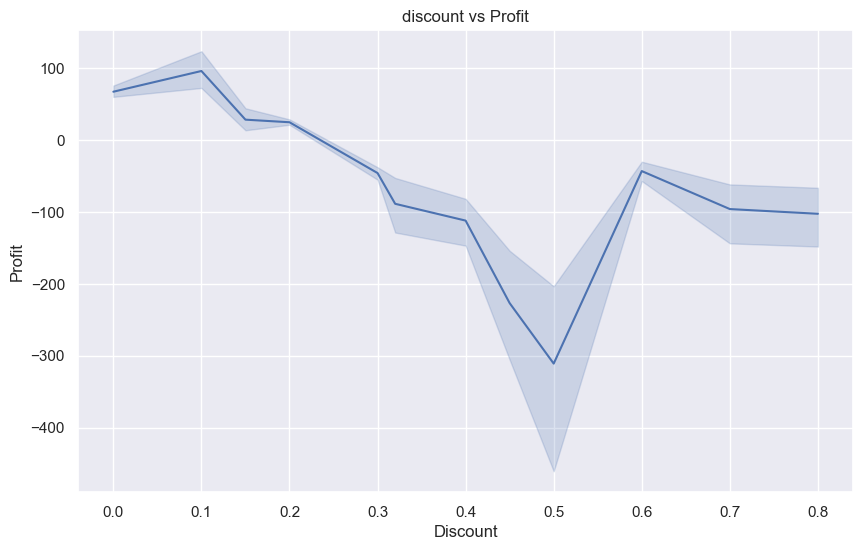

In [308]:
#line plot of discount vs Profit
plt.figure(figsize=(10,6))
sns.lineplot(x='Discount',y='Profit',data=df)
plt.legend
plt.title('discount vs Profit')


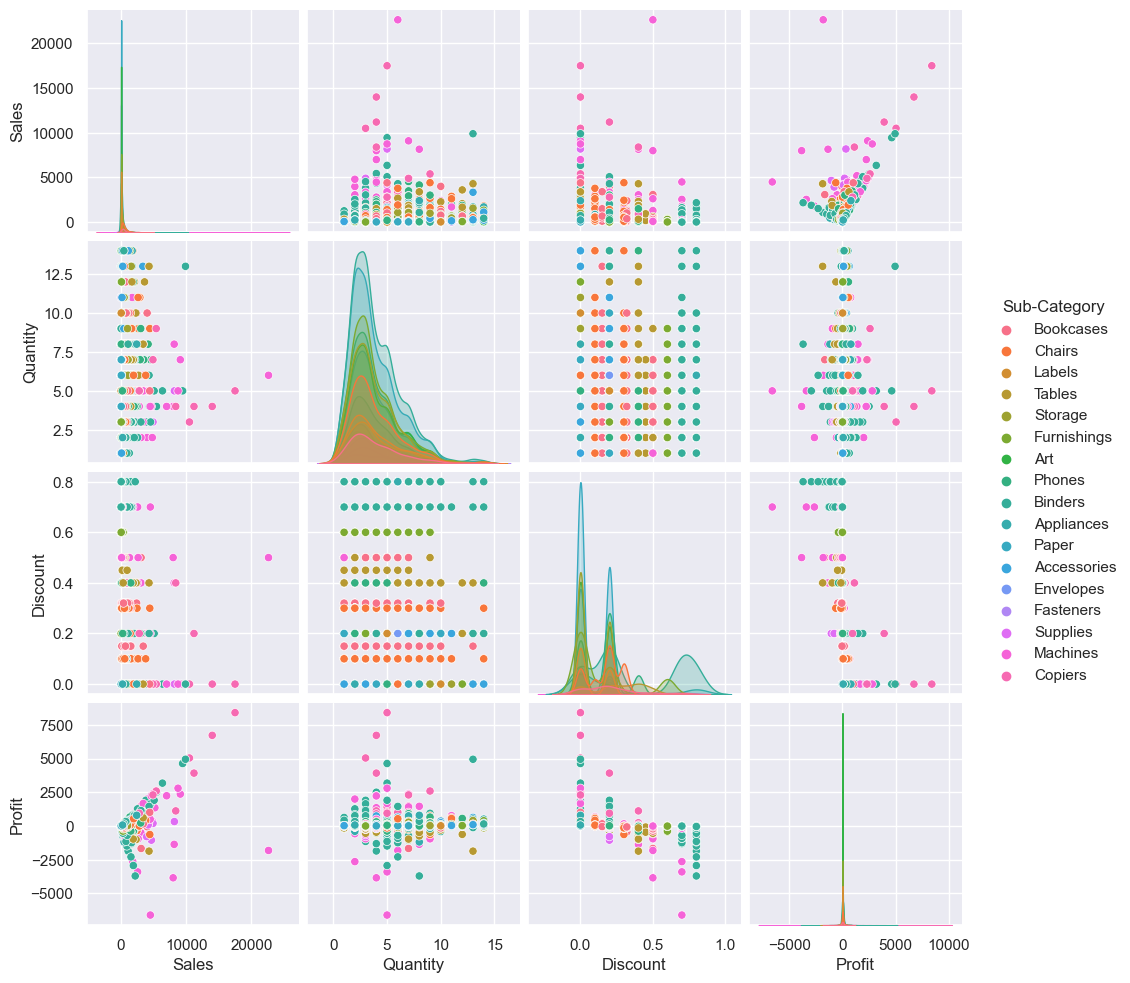

In [309]:
#pair plot of sub category
figsize=(15,12)
sns.pairplot(df,hue='Sub-Category')
